In [1]:
from Bio import SeqIO
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mcp_table = pd.read_csv('../Updated-RBP_V5_MCP.txt', sep='\t')

In [3]:
def make_key(d):
    return f'{d["Symbol"]}_{"_".join([i.strip(" ") for i in str(d["Accession"]).replace(".", "-").split(",")])}'

In [4]:
mcp_table['key'] = mcp_table.apply(make_key, axis=1)

In [5]:
mcp_table.head()

,Plate Location,Symbol,Gene ID,Size,Accession,nt_sequence,aa_sequence,Backup 96wp,Midiprep,Jon_Miniprep,Jon_Miniprep_50ngul,Glycerol Stock,Dot Blot Validation,key
0,GYRBP001.A01,CPNE3,8895.0,135.0,BC015734.1,ATGCTTGGAAACAGCATAGATATGTTGCTGTGGTTTTCAGAATTTT...,MLGNSIDMLLWFSEFSLLITRSLLKNDLHIFSCTVKQTEVSLSV,NaN,NaN,NaN,1,NaN,NaN,CPNE3_BC015734-1
1,GYRBP001.B01,RBMS1,5937.0,171.0,"BC065192.1, BC080620.1",ATGTATGGACACACACAAACAAAAAAGCATGAAGGAAGATTTGGAT...,MYGHTQTKKHEGRFGSKQCHTLHHHYKCSSVKKTNFETMKFLIHKY...,NaN,NaN,NaN,1,NaN,NaN,RBMS1_BC065192-1_BC080620-1
2,GYRBP001.C01,NOP10,55505.0,195.0,BC008886.2,ATGTTTCTCCAGTATTACCTCAACGAGCAGGGAGATCGAGTCTATA...,MFLQYYLNEQGDRVYTLKKFDPMGQQTCSAHPARFSPDDKYSRHRI...,NaN,NaN,NaN,1,NaN,NaN,NOP10_BC008886-2
3,GYRBP001.D01,FNDC3B,64778.0,204.0,BC012204.1,ATGATGATGACCGACCAAATCCCTCTGGAACTGCCACCATTGCTGA...,MMMTDQIPLELPPLLNGEVAMMPHLVNGDAAQQVILVQVNPGETFT...,NaN,NaN,NaN,0,NaN,NaN,FNDC3B_BC012204-1
4,GYRBP001.E01,RPS28,6234.0,210.0,"BC000354.1, BC021239.2",ATGGACACCAGCCGTGTGCAGCCTATCAAGCTGGCCAGGGTCACCA...,MDTSRVQPIKLARVTKVLGRTGSQGQCTQVRVEFMDDTSRSIIRNV...,NaN,NaN,NaN,1,NaN,NaN,RPS28_BC000354-1_BC021239-2


In [6]:
activators = pd.read_csv('activators_updated.txt', header=None)[0].tolist()

In [7]:
similarity_df = pd.read_csv('/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/seq_similarity/result.m8', sep='\t', header=None)

In [8]:
similarity_df[similarity_df[0].str.contains('PRPF4')]

,0,1,2,3,4,5,6,7,8,9,10,11
421,PRPF4B_BC034969,PRPF4B_BC034969,1.000,1008,0,0,1,1008,1,1008,0.000000e+00,1808
556,PRPF40A_BC027178-1,PRPF40A_BC027178-1,1.000,215,0,0,1,215,1,215,3.770000e-119,372
557,PRPF4_BC001588-2,PRPF4_BC001588-2,1.000,522,0,0,1,522,1,522,0.000000e+00,1085
558,PRPF4_BC001588-2,PRPF4_BC007424-2,0.998,522,1,0,1,522,1,521,0.000000e+00,1079
1114,PRPF4_BC007424-2,PRPF4_BC007424-2,1.000,521,0,0,1,521,1,521,0.000000e+00,1083
1115,PRPF4_BC007424-2,PRPF4_BC001588-2,0.998,522,1,0,1,521,1,522,0.000000e+00,1079


In [9]:
dist_df = similarity_df[(similarity_df[0] != similarity_df[1])].copy()

In [10]:
dist_df['tuple_sort'] = dist_df.apply(lambda x: sorted((x[0], x[1])), axis=1)

In [11]:
dist_df = dist_df.drop_duplicates(subset=['tuple_sort']).copy()

In [12]:
dist_df['protein1'] = dist_df.apply(lambda x: x[0].split('_')[0], axis=1)
dist_df['protein2'] = dist_df.apply(lambda x: x[1].split('_')[0], axis=1)

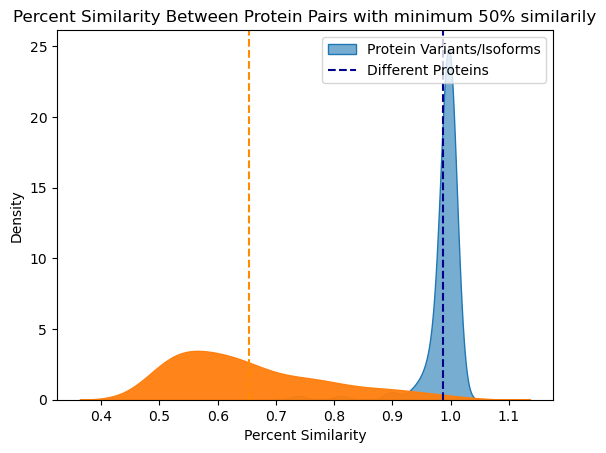

In [36]:
sns.kdeplot(dist_df[dist_df['protein1']==dist_df['protein2']][2], fill=True, alpha=0.6)
plt.axvline(dist_df[dist_df['protein1']==dist_df['protein2']][2].mean(), color='darkblue', linestyle='dashed')
sns.kdeplot(dist_df[dist_df['protein1']!=dist_df['protein2']][2],fill=True, alpha=0.95)
plt.axvline(dist_df[dist_df['protein1']!=dist_df['protein2']][2].mean(), color='darkorange', linestyle='dashed')
plt.legend({'Protein Variants/Isoforms' : 'blue', 'Different Proteins': 'orange'})
plt.title('Percent Similarity Between Protein Pairs with minimum 50% similarily')
plt.xlabel('Percent Similarity')
plt.savefig('pct_identity_distribution.png')
plt.savefig('pct_identity_distribution.svg')
plt.savefig('pct_identity_distribution.jpg')